In [1]:
# git clone package:
# !git clone <path_package>
# or copy package :
!cp -r /kaggle/input/autonlp-git/SentimentML-main /kaggle/working

In [2]:
import os
# directory of package :
fd = os.open("/kaggle/working/SentimentML-main", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/SentimentML-main'

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 561 kB 4.4 MB/s 
     |████████████████████████████████| 7.7 MB 55.5 MB/s 
     |████████████████████████████████| 280 kB 69.8 MB/s 
     |████████████████████████████████| 11.6 MB 52.3 MB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 80 kB 6.9 MB/s 
     |████████████████████████████████| 23.9 MB 28.1 MB/s 
     |████████████████████████████████| 2.6 MB 46.7 MB/s 
     |████████████████████████████████| 283 kB 64.8 MB/s 
     |████████████████████████████████| 70 kB 6.1 MB/s 
     |████████████████████████████████| 10.8 MB 59.7 MB/s 
     |████████████████████████████████| 301 kB 48.1 MB/s 
     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 12.8 MB 62.8 MB/s 
     |████████████████████████████████| 394.3 MB 10 kB/s 
     |████████████████████████████████| 47.5 MB 61.1 MB/s 
     |████████████

In [4]:
!pip install -U sentence-transformers

  Using cached sentence_transformers-2.0.0-py3-none-any.whl
  Using cached huggingface_hub-0.0.17-py3-none-any.whl (52 kB)
     |████████████████████████████████| 2.9 MB 4.2 MB/s 
  Attempting uninstall: transformers
    Found existing installation: transformers 4.0.1
    Uninstalling transformers-4.0.1:
      Successfully uninstalled transformers-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 1.3.0 requires transformers<4.1,>=4.0, but you have transformers 4.11.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
# if png doesn't save correctly
!pip install kaleido

     |████████████████████████████████| 79.9 MB 174 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
# if spacy can't load spacy model :
!python3 -m spacy download fr_core_news_md

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
     |████████████████████████████████| 46.1 MB 5.4 MB/s 
  Created wheel for fr-core-news-md: filename=fr_core_news_md-2.3.0-py3-none-any.whl size=46100669 sha256=3a1db1379c696692a8be11a5200e2fe1032decbe2473d006aa3c6ecb21723dc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ekv8wxhq/wheels/62/a5/93/9c82d8ae84430ed80720262c11726d046d3444af301b7d2895
Successfully built fr-core-news-md
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


# Import

In [7]:
import pandas as pd
from autonlp.autonlp import AutoNLP
import os
from pathlib import Path
from autonlp.flags import Flags, save_yaml
import dataclasses

# Flags update (parameters)

In [8]:
#####################
# Parameters
#####################

flags_dict_info = {
    "path_data": "/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv",
    "path_data_validation": "",
    "apply_logs": True,
    "outdir": "/kaggle/working/logs",
    "seed": 15,
    "debug": False,  # for debug : use only 50 data rows for training
}
flags_dict_preprocessing = {
    "column_text": "text_fr",  # name column with texts
    "target": "sentiment",     # name column with targets
    "language_text": "fr",
    "apply_small_clean": True,
    "name_spacy_model": "fr_core_news_md",
    "apply_spacy_preprocessing": True,
    "apply_entity_preprocessing": True
}

flags_dict_autonlp = {
    "objective": 'multi-class',    # 'binary' or 'multi-class' or 'regression'
    
    "embedding": {"tf": 1, "tf-idf": 2, "word2vec": None, "fasttext": None, "doc2vec": None, "transformer": None},
    
    "classifier": {"Naive_Bayes": [1], "Logistic_Regression": [1], "SGD_Classifier": [2],
                   "XGBoost": [], "Global_Average": [], "Attention": [], "BiRNN": [], "BiRNN_Attention": [],
                   "biLSTM": [], "BiLSTM_Attention": [], "biGRU": [], "BiGRU_Attention": []},
    
    "max_run_time_per_model": 60,
    "frac_trainset": 0.7,
    "scoring": 'f1',
    "average_scoring": "macro",
    "nfolds": 5,
    "nfolds_train": 5,
    "class_weight": True,
    "apply_blend_model": True,
    "verbose": 2,
    "method_embedding": {'Word2vec': 'Word2Vec',
                         'Fasttext': 'FastText',
                         'Doc2Vec': 'Doc2Vec',
                         'Transformer': 'CamemBERT',
                         'spacy': [(['ADJ', 'NOUN', 'VERB'], True)]},

    "apply_optimization": True,
    "apply_validation": True,
    
    "batch_size":32,
    "tr_learning_rate": [3e-5],
    "tr_maxlen": 100,
    "patience":2
}

flags_dict_display = {
    "sort_leaderboard": 'f1'
}

flags = Flags().update(flags_dict_info)
flags = flags.update(flags_dict_preprocessing)
flags = flags.update(flags_dict_autonlp)
flags = flags.update(flags_dict_display)
print("flags :", flags)
debug = flags.debug
outdir = Path(flags.outdir)
os.makedirs(str(outdir), exist_ok=True)
flags_dict = dataclasses.asdict(flags)
save_yaml(outdir / "flags.yaml", flags_dict)

flags : Flags(path_data='/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv', path_data_validation='', apply_logs=True, outdir='/kaggle/working/logs', apply_mlflow=False, experiment_name='Experiment', apply_app=False, debug=False, seed=15, column_text='text_fr', language_text='fr', target='sentiment', apply_small_clean=True, name_spacy_model='fr_core_news_md', apply_spacy_preprocessing=True, apply_entity_preprocessing=True, objective='multi-class', embedding={'tf': 1, 'tf-idf': 2, 'word2vec': None, 'fasttext': None, 'doc2vec': None, 'transformer': None}, classifier={'Naive_Bayes': [1], 'Logistic_Regression': [1], 'SGD_Classifier': [2], 'XGBoost': [], 'Global_Average': [], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_Attention': []}, regressor={'SGD_Regressor': [1], 'XGBoost': [], 'Global_Average': [2], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_A

# Instantiation

In [9]:
autonlp = AutoNLP(flags)

# Preprocessing

In [10]:
%%time
autonlp.data_preprocessing()


Read data...

Begin preparation of 3876 data :

Training set size : 2713
Test set size : 1163

Begin preprocessing of 2713 train data :
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')
- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...

Begin preprocessing of 1163 test data :
- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...
CPU times: user 23.4 s, sys: 1.58 s, total: 25 s
Wall time: 29 s


# Training

In [11]:
autonlp.train()

List of models : ['tf+Naive_Bayes_ADJ_NOUN_VERB_lem', 'tf+Logistic_Regression_ADJ_NOUN_VERB_lem', 'tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem']


Unknown path for path_models_best_parameters, a new dictionary has been created.



tf+Naive_Bayes_ADJ_NOUN_VERB_lem Model:
- Optimization of parameters:
  5%|▌         | 54/1000 [01:00<17:47,  1.13s/trial, best loss: -0.654368697475744]
Best parameters: {'clf__alpha': 0.36001521146929666, 'vect__tf__binary': False, 'vect__tf__ngram_range': (1, 2), 'vect__tf__stop_words': None}
Mean cross-validated score of the best_estimator: 0.6544
Time search : 60.986021325000024

- Training & Cross-Validation:
Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:

Scores :
accuracy = 0.7136
precision macro = 0.661
recall macro = 0.6498
f1 score macro = 0.6544


Time validation : 2.073941727000033

tf+Logistic_Regression_ADJ_NOUN_VERB_lem Model:
- Optimization of parameters:
  1%|          | 9/1000 [01:29<2:44:30,  9.96s/trial, best loss: -0.6866247851813445]
Best parameters: {'clf__C': 0.13952083898032877, 'clf__penalty': 'l2', 'vect__tf__binary': False, 'vect__tf__ngram_range': (1, 1), 'vect__tf__stop_words': None}
Mean cross-validated score of the best_estimator: 0.6866
Time search : 89.6616

# Leaderboard (Train score)

In [12]:
leaderboard_train = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='train')
print('Train Leaderboard')
leaderboard_train.to_csv(os.path.join(flags.outdir,'leaderboard_train.csv'), index=False)
leaderboard_train

Train Leaderboard


,name,accuracy_train,recall_macro_train,precision_macro_train,f1_macro_train
2,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem,0.9728,0.9636,0.9735,0.9684
0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem,0.9680,0.9747,0.9407,0.9559
1,tf+Logistic_Regression_ADJ_NOUN_VERB_lem,0.9004,0.9100,0.8673,0.8856


# Leaderboard (Validation score)

In [13]:
leaderboard_val = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='val')
print('\nValidation Leaderboard')
leaderboard_val.to_csv(os.path.join(flags.outdir,'leaderboard_val.csv'), index=False)
leaderboard_val


Validation Leaderboard


,name,accuracy_val,recall_macro_val,precision_macro_val,f1_macro_val
2,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem,0.7490,0.6799,0.7112,0.6936
1,tf+Logistic_Regression_ADJ_NOUN_VERB_lem,0.7353,0.6925,0.6837,0.6866
3,BlendModel,0.7372,0.6736,0.6885,0.6798
0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem,0.7136,0.6498,0.6610,0.6544


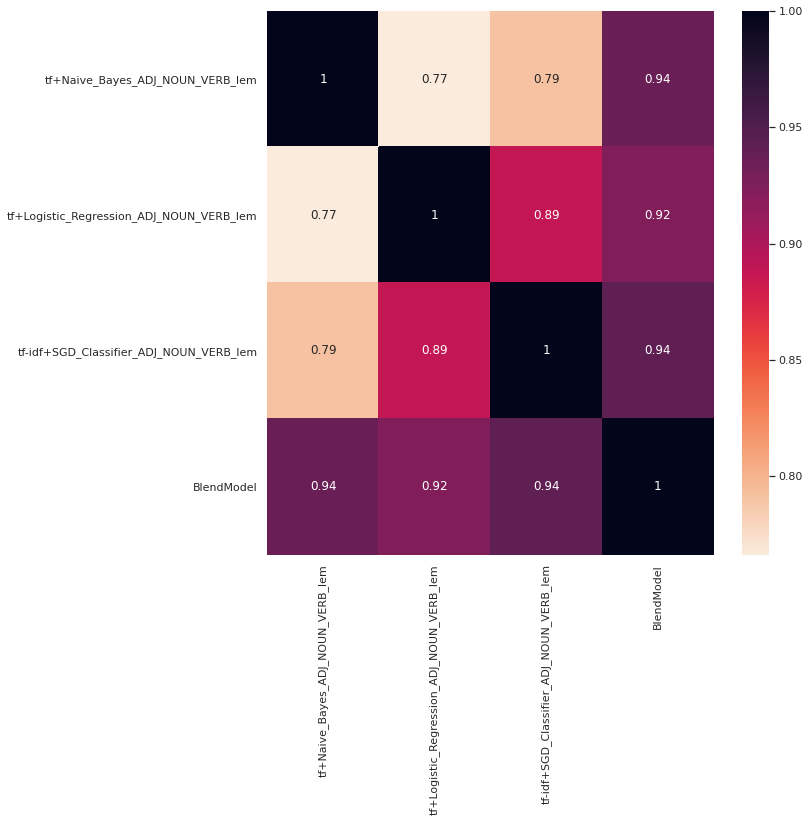

In [14]:
# correlation between oof_val predictions
autonlp.correlation_models()

In [15]:
df_all_results = pd.read_csv("/kaggle/working/logs/df_all_results.csv")
if len(df_all_results) > 0:
    df_all_results_mean = df_all_results.groupby('model').mean().sort_values('mean_test_score', ascending=False)
    print('\nGridSearch information Leaderboard')
    df_all_results.to_csv(os.path.join(flags.outdir,'df_all_results_mean.csv'), index=False)
    print(df_all_results_mean)


GridSearch information Leaderboard
                                          mean_fit_time  train_score  \
model                                                                  
tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem        1.579127     0.857536   
tf+Naive_Bayes_ADJ_NOUN_VERB_lem               1.117737     0.937565   
tf+Logistic_Regression_ADJ_NOUN_VERB_lem       9.951962     0.759953   

                                          mean_test_score  std_test_score  
model                                                                      
tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem          0.638687               0  
tf+Naive_Bayes_ADJ_NOUN_VERB_lem                 0.638212               0  
tf+Logistic_Regression_ADJ_NOUN_VERB_lem         0.604748               0  


In [16]:
df_all_results

,mean_fit_time,params,train_score,mean_test_score,std_test_score,model
0,1.077765,"{'clf__alpha': 0.36001521146929666, 'vect__tf_...",0.955919,0.654369,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
1,1.072137,"{'clf__alpha': 0.5231191008097137, 'vect__tf__...",0.961469,0.653424,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
2,1.097148,"{'clf__alpha': 0.3670856157962754, 'vect__tf__...",0.955889,0.653375,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
3,1.103849,"{'clf__alpha': 0.3670609442385899, 'vect__tf__...",0.955889,0.653375,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
4,1.117036,"{'clf__alpha': 0.5460822599644715, 'vect__tf__...",0.961928,0.652937,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
...,...,...,...,...,...,...
96,0.691670,"{'clf__alpha': 0.005137470170323982, 'clf__los...",0.559670,0.515019,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem
97,2.258330,"{'clf__alpha': 0.0016145594952467807, 'clf__lo...",0.428253,0.445599,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem
98,2.257832,"{'clf__alpha': 0.009685221089880448, 'clf__los...",0.403532,0.411888,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem
99,0.725548,"{'clf__alpha': 0.0051497425443507395, 'clf__lo...",0.398951,0.389554,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem


In [17]:
df_all_results.groupby(['model'])['mean_test_score'].max()

model
tf+Logistic_Regression_ADJ_NOUN_VERB_lem    0.686625
tf+Naive_Bayes_ADJ_NOUN_VERB_lem            0.654369
tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem     0.693555
Name: mean_test_score, dtype: float64

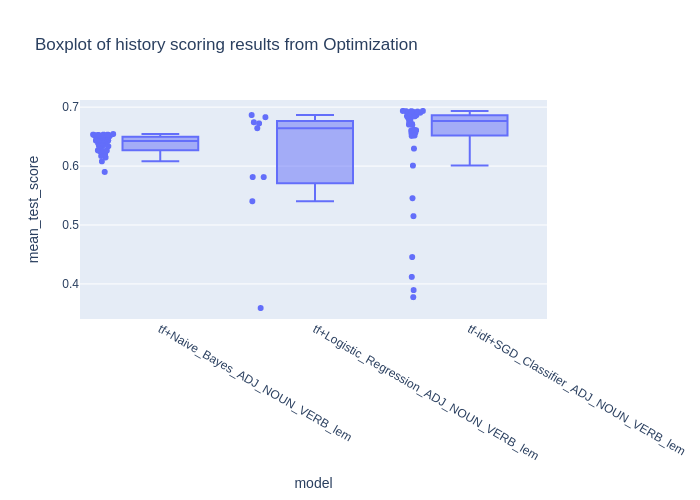

In [18]:
from PIL import Image
Image.open(os.path.join(flags.outdir, 'boxplot_df_all_results.png'))

In [19]:
try:
    Image.open(os.path.join(flags.outdir, 'last_logs', 'metric_scores_val.png'))
except:
    pass

# Testing on test set from train/test split

In [20]:
name_logs = 'best_logs'
on_test_data = True
autonlp.leader_predict(name_logs = name_logs, on_test_data = on_test_data)


tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem Model:
Model fold4.joblib:
Inference : 1163 samples in 0.037932395935058594 sec ( 30659.80862350723 / sample).

Scores :
accuracy = 0.7524
precision macro = 0.7124
recall macro = 0.6795
f1 score macro = 0.6939


Model fold0.joblib:
Inference : 1163 samples in 0.03697347640991211 sec ( 31454.981054695058 / sample).

Scores :
accuracy = 0.7524
precision macro = 0.7152
recall macro = 0.6511
f1 score macro = 0.6759


Model fold2.joblib:
Inference : 1163 samples in 0.040824174880981445 sec ( 28488.022192502438 / sample).

Scores :
accuracy = 0.7343
precision macro = 0.688
recall macro = 0.6537
f1 score macro = 0.6686


Model fold1.joblib:
Inference : 1163 samples in 0.03998541831970215 sec ( 29085.602924077728 / sample).

Scores :
accuracy = 0.7455
precision macro = 0.6951
recall macro = 0.6753
f1 score macro = 0.683


Model fold3.joblib:
Inference : 1163 samples in 0.03734087944030762 sec ( 31145.490342806428 / sample).

Scores :
accuracy = 0.742
pr

In [21]:
leaderboard_test = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='test', info_models=autonlp.info_models)
print('\nTest Leaderboard')
leaderboard_test


Test Leaderboard


,name,accuracy_test,recall_macro_test,precision_macro_test,f1_macro_test
0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem,0.7532,0.6743,0.7195,0.6935
2,tf+Logistic_Regression_ADJ_NOUN_VERB_lem,0.7463,0.6753,0.6859,0.6800
3,BlendModel,0.7386,0.6673,0.6930,0.6777
1,tf+Naive_Bayes_ADJ_NOUN_VERB_lem,0.7085,0.6344,0.6555,0.6436


# Testing on other test set

In [22]:
data_test = pd.read_csv("/kaggle/input/finance-corpus/FinancialPhraseBank_test.csv")

In [23]:
X_test, doc_spacy_data_test, Y_test = autonlp.preprocess_test_data(data_test)

- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...


In [24]:
name_logs = 'best_logs'
on_test_data = False
autonlp.leader_predict(name_logs = name_logs, on_test_data = on_test_data, x = X_test, y=Y_test,
                       doc_spacy_data_test = doc_spacy_data_test)


tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem Model:
Model fold4.joblib:
Inference : 969 samples in 0.033110857009887695 sec ( 29265.325259042173 / sample).

Scores :
accuracy = 0.7337
precision macro = 0.6811
recall macro = 0.6575
f1 score macro = 0.6681


Model fold0.joblib:
Inference : 969 samples in 0.03468632698059082 sec ( 27936.079843282812 / sample).

Scores :
accuracy = 0.7327
precision macro = 0.6761
recall macro = 0.6342
f1 score macro = 0.6511


Model fold2.joblib:
Inference : 969 samples in 0.032817840576171875 sec ( 29526.622805997908 / sample).

Scores :
accuracy = 0.7358
precision macro = 0.6783
recall macro = 0.6562
f1 score macro = 0.6655


Model fold1.joblib:
Inference : 969 samples in 0.032318115234375 sec ( 29983.18413597734 / sample).

Scores :
accuracy = 0.7399
precision macro = 0.6878
recall macro = 0.6665
f1 score macro = 0.6736


Model fold3.joblib:
Inference : 969 samples in 0.035214900970458984 sec ( 27516.7606125848 / sample).

Scores :
accuracy = 0.7172
precisi

In [25]:
leaderboard_test = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='test', info_models=autonlp.info_models)
print('\nTest Leaderboard')
leaderboard_test


Test Leaderboard


,name,accuracy_test,recall_macro_test,precision_macro_test,f1_macro_test
0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem,0.7441,0.6562,0.6957,0.6727
3,BlendModel,0.7265,0.6522,0.6678,0.6587
2,tf+Logistic_Regression_ADJ_NOUN_VERB_lem,0.7121,0.6553,0.6538,0.6537
1,tf+Naive_Bayes_ADJ_NOUN_VERB_lem,0.7007,0.6375,0.6380,0.6371
